# Ładownie danych

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # visualization library

data = pd.read_csv("input/paysim.csv")

Podgląd kluku pierwszych wierszy oraz struktury danych

In [2]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Informacje o typie danych w poszczególnych kolumnach

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data['isFlaggedFraud'].sum()

16

W danych dostępna jest kolumna isFlaggedFraud, która jest oznaczana gdy przelew był na kwoty większe niż 200 000. Flaga ta została pominięta, ponieważ występuje ona tylko 16 razy w całym zbiorze danych. Pomijane są również kolumny nameOrig oraz nameDest.

In [6]:
data.drop(['nameOrig','nameDest','isFlaggedFraud'], axis = 1, inplace=True)

Wizualizacja danych

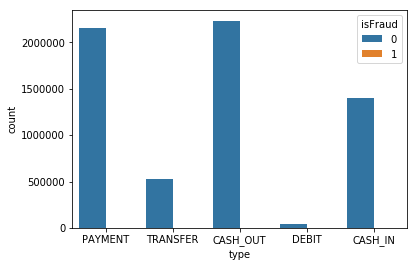

In [7]:
sns.countplot(data['type'], hue = data['isFraud'])

Można tutaj zauważyć, że oszustwa są tylko w typach TRANSFER oraz CASH_OUT.

In [8]:
data[data['isFraud']==1].groupby('type').count()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,,,,,,,
CASH_OUT,4116,4116,4116,4116,4116,4116,4116
TRANSFER,4097,4097,4097,4097,4097,4097,4097


# Przygotowanie danych

Przed przystąpieniem do algorytmu powinniśmy znormalizować dane.

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_toScale = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
new_X = sc.fit(X_toScale)
X_scaled = new_X.transform(X_toScale)

Tworzenie DataFrame ze znormalizowanych danych.

In [10]:
scaled_df = pd.DataFrame(X_scaled, columns=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])

Pozostałą kolumnę 'type' przekształcamy na typ dummy oraz łączymy z finalnym DataFrame.

In [11]:
dummy_df = pd.DataFrame(pd.get_dummies(data['type']))
final_df = scaled_df.join(dummy_df, how = 'outer')

Ostatecznie dane prezentują się następująco.

In [12]:
final_df.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,0,1,0
1,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,0,1,0
2,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,0,0,0,0,1
3,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,0,1,0,0,0
4,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,0,1,0


# Algorytm

Po przygotowaniu danych możemy przystąpić do stworzenia modelu. Wkorzystamy model RandomForestClassifier ze 10 drzewami.

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)

Następnie dzielimy dane na próbę uczącą i trenującą.

In [14]:
from sklearn.model_selection import train_test_split

X = final_df
y = data['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Ostatecznie przechodzimy do uczenia naszego modelu, przez podanie mu danych.

In [18]:
model = rfc.fit(X_train,y_train)
predictions = model.predict(X_test)

# Wyniki

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.78      0.86      2435

   micro avg       1.00      1.00      1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906273      78]
 [    536    1899]]


# Wizualizacja pierwszego drzewa

In [20]:
estimator = model.estimators_[0]

In [21]:
from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='tree.dot', feature_names=X.columns)

In [22]:
import os

os.system('dot -Tpng tree.dot -o tree.png')

0

In [23]:
from IPython.display import Image
Image(filename = 'tree.png')